<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Машинное обучение и майнинг данных"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# Занятие 6. Задача восстановления регрессии. Обучение без учителя

### Практика. Кластеризация данных с акселерометров и гироскопов мобильных телефонов. Решение

**Считываем <a href="https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones">данные</a> Samsung Human Activity Recognition.**

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = np.vstack((np.loadtxt("../../data/samsung_train.txt"), 
        np.loadtxt("../../data/samsung_test.txt")))

y = np.hstack((np.loadtxt("../../data/samsung_train_labels.txt"), 
        np.loadtxt("../../data/samsung_test_labels.txt"))).astype(int)

Populating the interactive namespace from numpy and matplotlib


**Опеределим число уникальных значений меток целевого класса. Эти метки соответствуют ходьбе, подъему вверх по лестнице, спуску по лестнице, сидению, стоянию и лежанию. [Описание](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names)**

In [2]:
k = len(np.unique(y))
k

6

In [5]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=321, n_iter=300)
tsne_representation = tsne.fit_transform(X)

CPU times: user 5min 42s, sys: 1min 4s, total: 6min 46s
Wall time: 5min 20s


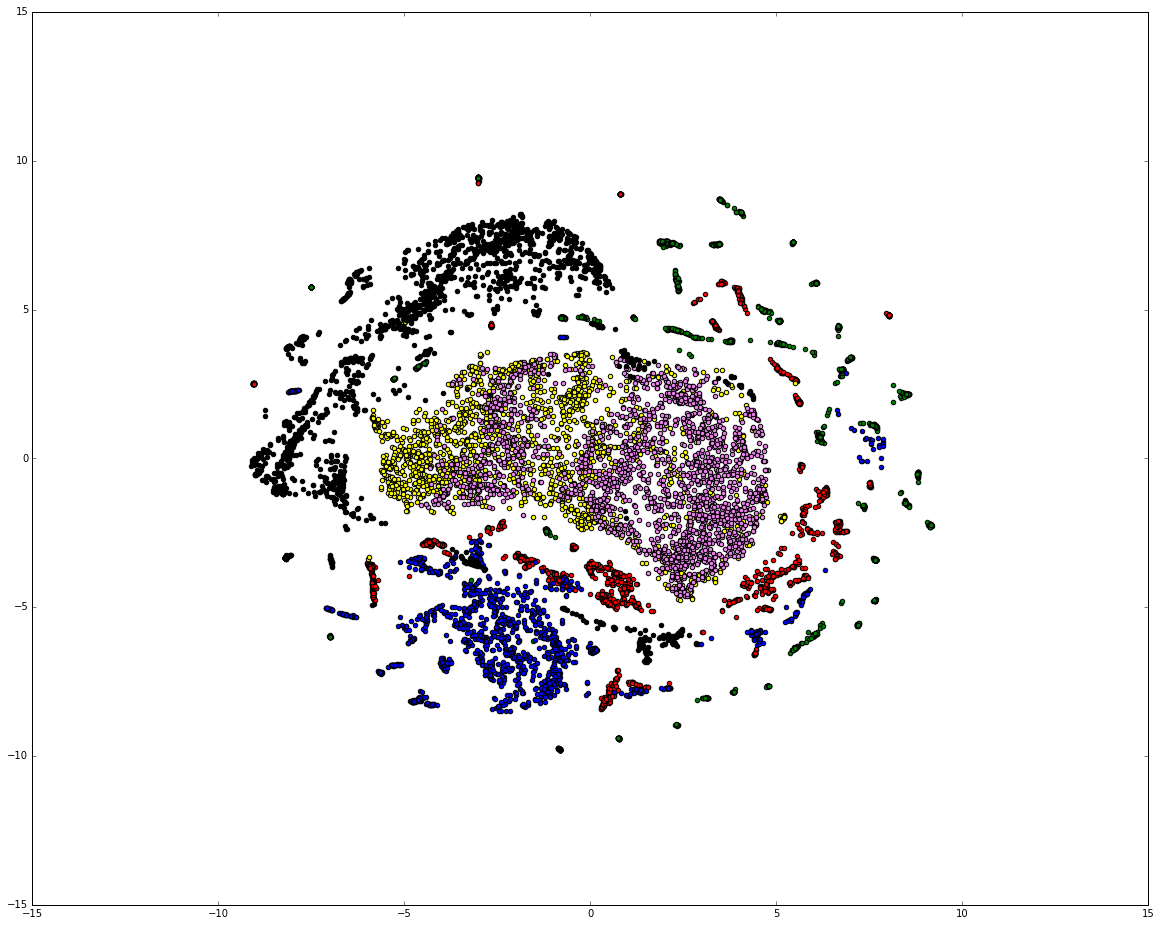

In [16]:
figsize(20,16)
for (activity, color) in zip(np.unique(y), ['green', 'red', 'blue', 'yellow', 'violet', 'black']):
    scatter(tsne_representation[np.where(y == activity)[0], 0], 
            tsne_representation[np.where(y == activity)[0], 1], c=color)

**Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить 90% дисперсии.**

In [3]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

X = PCA(0.9).fit_transform(scale(X))
X.shape

(10299, 65)

**Проводим кластеризацию с помощью метода k-means.**

In [4]:
%%time
y_pred = KMeans(n_clusters=k, n_init=100).fit_predict(X)

CPU times: user 32.7 s, sys: 596 ms, total: 33.3 s
Wall time: 20.2 s


**Визуализируем результат в проекции на первые две главные компоненты.**

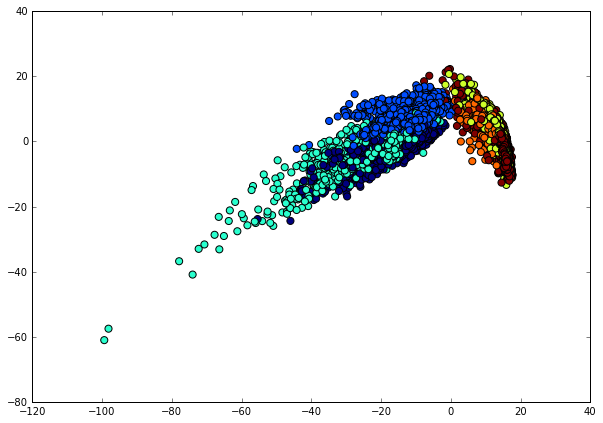

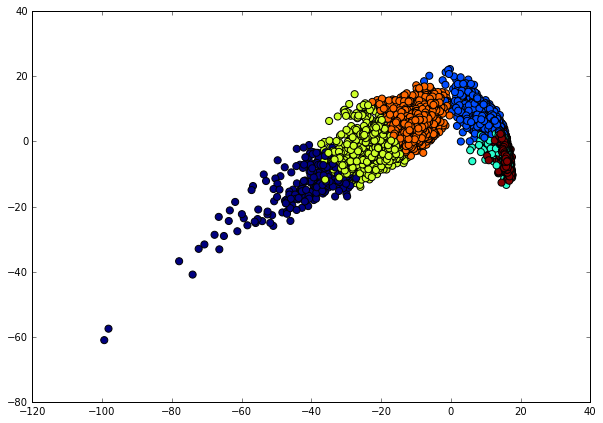

In [5]:
plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50)

**Посмотрим на соответствие между метками кластеров и исходными метками классов.**

In [6]:
from pandas import crosstab
crosstab(y, y_pred, margins=True)

col_0,0,1,2,3,4,5,All
row_0,,,,,,,
1,78,0,0,741,903,0,1722
2,5,2,0,296,1241,0,1544
3,196,0,0,890,320,0,1406
4,0,450,1235,0,1,91,1777
5,0,562,1344,0,0,0,1906
6,0,329,52,0,5,1558,1944
All,279,1343,2631,1927,2470,1649,10299


**Вычислим основные метрики качества кластеризации (стоит отметить, что они не зависят от самих значений меток, поэтому можно не заботиться о том, какой кластер какому классу соответствует).**

In [7]:
from sklearn import metrics

print('ARI =', metrics.adjusted_rand_score(y, y_pred))
print('AMI =', metrics.adjusted_mutual_info_score(y, y_pred))
print('Homogeneity =', metrics.homogeneity_score(y, y_pred))
print('Completeness =', metrics.completeness_score(y, y_pred))
print('V-measure =', metrics.v_measure_score(y, y_pred))
print('Silhouette =', metrics.silhouette_score(X, y_pred, 
                                               metric='euclidean'))

ARI = 0.41980700126
AMI = 0.540444125044
Homogeneity = 0.540757811646
Completeness = 0.581157977046
V-measure = 0.560230489767
Silhouette = 0.14150241544


## Cсылки

- [Внешние и внутренние метрики качества](https://en.wikipedia.org/wiki/Cluster_analysis#Evaluation_and_assessment)
- <a href="https://en.wikipedia.org/wiki/Silhouette_(clustering)">Силуэт</a>
- [Информация в sklearn](http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)